In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected = True)

import cufflinks as cf

# Use Plotly locally
cf.go_offline()

# Import the libraries

In [2]:
df = pd.read_csv("Online Retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Information about the column type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Customer ID and description has missing values. Invoice date is present as object type instead of date time.

### Checking total null values

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### Drop column

In [5]:
df = df.drop(columns=['CustomerID'])

### Analysing Description Column

In [6]:
df['Description'] = df['Description'].fillna('No Description')

### Checking null values once again

In [7]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

## Changing Date column type

In [8]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

## Statistical description of data set

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0


Here we see that Quantity and Unit price are in negative. This has to be seen later as these values should ideally be positive in nature.

## Splitting Invoice Date column into year, month, date and time column seperately

In [10]:
df["Year"] = (df["InvoiceDate"]).dt.year
df["Month"] = (df["InvoiceDate"]).dt.month
df["Day"] = (df["InvoiceDate"]).dt.day
df["Time"] = df["InvoiceDate"].dt.strftime('%H:%M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Year,Month,Day,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010,12,1,08:26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,08:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010,12,1,08:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,08:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,08:26


## Segregate day column as weekend or weekday

In [11]:
df['DayName'] = df['InvoiceDate'].dt.day_name()

In [12]:
df.DayName.value_counts()

Thursday     103857
Tuesday      101808
Monday        95111
Wednesday     94565
Friday        82193
Sunday        64375
Name: DayName, dtype: int64

In [13]:
df["DayNum"] = df['InvoiceDate'].dt.dayofweek
df["IsWeekend"] = (df["DayNum"] >= 5).astype(int)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Year,Month,Day,Time,DayName,DayNum,IsWeekend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010,12,1,08:26,Wednesday,2,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,08:26,Wednesday,2,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010,12,1,08:26,Wednesday,2,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,08:26,Wednesday,2,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,08:26,Wednesday,2,0


In [14]:
df[df["IsWeekend"] == 1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Year,Month,Day,Time,DayName,DayNum,IsWeekend
7419,537037,22114,HOT WATER BOTTLE TEA AND SYMPATHY,8,2010-12-05 10:03:00,3.95,United Kingdom,2010,12,5,10:03,Sunday,6,1
7420,537037,21485,RETROSPOT HEART HOT WATER BOTTLE,6,2010-12-05 10:03:00,4.95,United Kingdom,2010,12,5,10:03,Sunday,6,1
7421,537037,22835,HOT WATER BOTTLE I AM SO POORLY,3,2010-12-05 10:03:00,4.65,United Kingdom,2010,12,5,10:03,Sunday,6,1
7422,537037,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-05 10:03:00,3.75,United Kingdom,2010,12,5,10:03,Sunday,6,1
7423,537037,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-05 10:03:00,3.75,United Kingdom,2010,12,5,10:03,Sunday,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524198,580537,23266,SET OF 3 WOODEN STOCKING DECORATION,1,2011-12-04 16:08:00,1.25,United Kingdom,2011,12,4,16:08,Sunday,6,1
524199,580537,23267,SET OF 4 SANTA PLACE SETTINGS,1,2011-12-04 16:08:00,1.25,United Kingdom,2011,12,4,16:08,Sunday,6,1
524200,580537,23312,VINTAGE CHRISTMAS GIFT SACK,2,2011-12-04 16:08:00,4.15,United Kingdom,2011,12,4,16:08,Sunday,6,1
524201,580537,23319,BOX OF 6 MINI 50'S CRACKERS,1,2011-12-04 16:08:00,2.49,United Kingdom,2011,12,4,16:08,Sunday,6,1


## Segregate time column as office time or free time

In [15]:
end_time = '17:00'
start_time = '09:00'
df["OfficeTime"] = ((df['Time'] > start_time) & (df['Time'] < end_time)).astype(int)

In [16]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Year,Month,Day,Time,DayName,DayNum,IsWeekend,OfficeTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010,12,1,08:26,Wednesday,2,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,08:26,Wednesday,2,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010,12,1,08:26,Wednesday,2,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,08:26,Wednesday,2,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,08:26,Wednesday,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,2011,12,9,12:50,Friday,4,0,1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,2011,12,9,12:50,Friday,4,0,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,2011,12,9,12:50,Friday,4,0,1
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,2011,12,9,12:50,Friday,4,0,1


## Segregate month into season 

## Checking negative value

### Quantity

Assuming that quantity should not be negative we will just remove the "-" sign from the quantity value.

In [17]:
df['Quantity'] = df['Quantity'].astype(str).str.replace('-', '').astype(int)

### Unit Price

In [18]:
df['UnitPrice'] = df['UnitPrice'].astype(str).str.replace('-', '').astype(float)

## Creating Sale Column

In [19]:
df["Sale"] = df["UnitPrice"] * df["Quantity"]

## Detecting Outliers

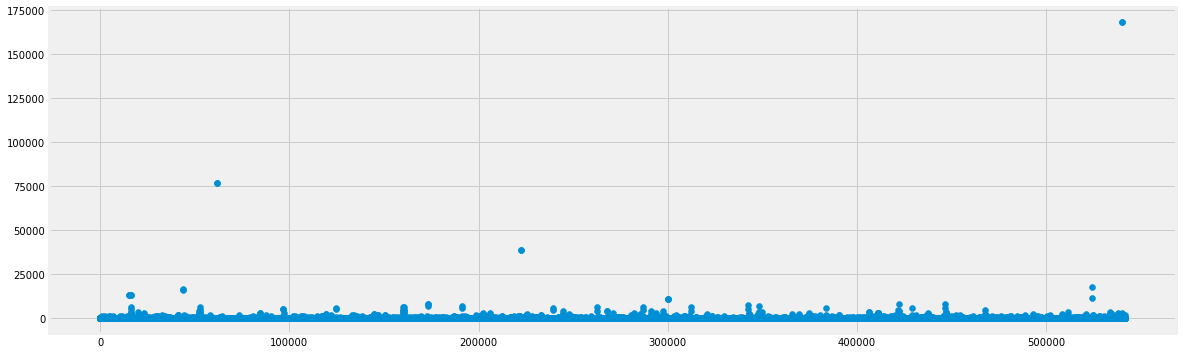

In [20]:
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['Sale'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   Country      541909 non-null  object        
 7   Year         541909 non-null  int64         
 8   Month        541909 non-null  int64         
 9   Day          541909 non-null  int64         
 10  Time         541909 non-null  object        
 11  DayName      541909 non-null  object        
 12  DayNum       541909 non-null  int64         
 13  IsWeekend    541909 non-null  int64         
 14  OfficeTime   541909 non-null  int64         
 15  Sale         541909 non-null  floa

# EDA

## Popular Countries 

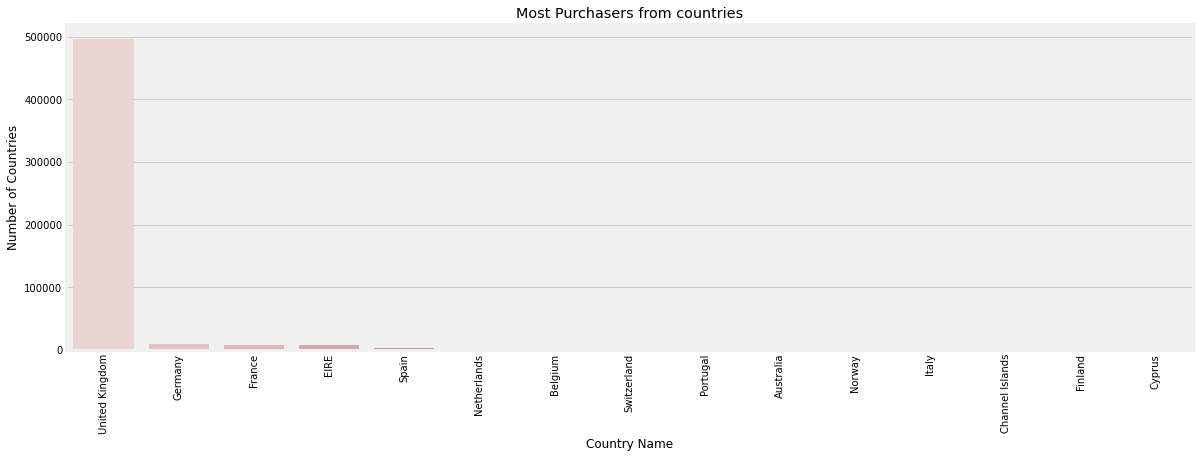

In [22]:
country_count = df["Country"].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(country_count.index, country_count.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Number of Countries")
plt.xlabel("Country Name")
plt.title("Most Purchasers from countries")
plt.xticks(rotation = 90);

United Kingdom is the highest purchaser compared to others. Let us create two dataframe one of UK and other without it.

In [23]:
df_uk = df.loc[df["Country"] == "United Kingdom"]
df_uk.shape

(495478, 16)

In [24]:
df_no_uk = df.loc[df["Country"] != "United Kingdom"]
df_no_uk.shape

(46431, 16)

In [25]:
total_percent_uk = (df_uk.shape[0]/df.shape[0]) * 100
print("UK percentage of total data", total_percent_uk)

UK percentage of total data 91.43195628786383


From above we can see that UK greater than 90% of total data

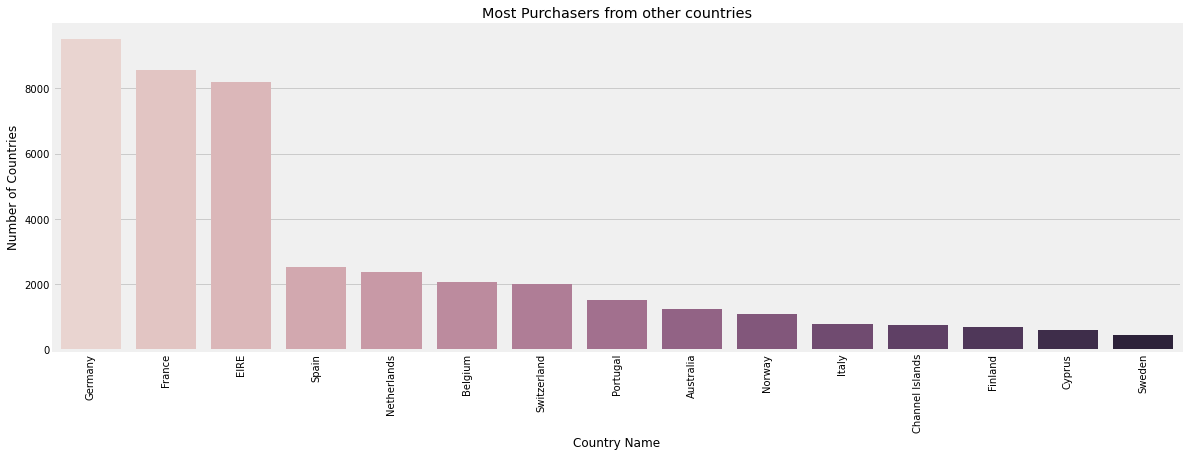

In [26]:
country_count = df_no_uk["Country"].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(country_count.index, country_count.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Number of Countries")
plt.xlabel("Country Name")
plt.title("Most Purchasers from other countries")
plt.xticks(rotation = 90);

## Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

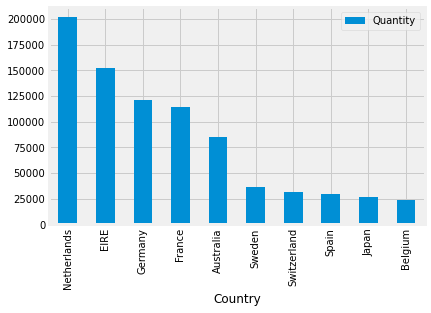

In [27]:
df_no_uk.groupby("Country").agg({"Quantity": sum}).sort_values("Quantity",
                                    ascending = False)[:10].plot(kind = "bar");


In [28]:
import plotly.io as pio
import plotly.express as px

pio.templates.default = "ggplot2"


## Check total sale in week

In [29]:
df_sale = df_no_uk.groupby(["Country", "OfficeTime", "IsWeekend"]).agg({
    "Sale" : sum
}).reset_index()

In [30]:
fig = px.histogram(df_sale, x = "Country",y = "Sale", color = "OfficeTime", facet_col = "IsWeekend")
fig.show()

From the above graph it seems maximum products are ordered during office time and in week days.

## Popular items according to description

In [108]:
df_des = df_no_uk.groupby(["Description", "Month"]).agg({
    "Description": "count",
    "Quantity": "sum"
})

In [109]:
df_des.rename(columns = {
    "Description" : "Count"
}, inplace = True)

In [110]:
df_des.sort_values("Count", ascending = False)

Count  Quantity
Description                         Month                 
POSTAGE                             11       174       481
                                    10       118       336
                                    12       114       345
                                    9        106       274
                                    5         88       244
...                                          ...       ...
LARGE CAKE STAND HANGING HEARTS     12         1         4
LARGE CAKE STAND  HANGING STRAWBERY 7          1         2
                                    6          1         1
                                    4          1         4
ZINC WIRE SWEETHEART LETTER TRAY    12         1         8

[14568 rows x 2 columns]

In [114]:
df_des_c = df_des.sort_values("Count", ascending = False).reset_index(1)
df_des_c

,Month,Count,Quantity
Description,,,
POSTAGE,11,174,481
POSTAGE,10,118,336
POSTAGE,12,114,345
POSTAGE,9,106,274
POSTAGE,5,88,244
...,...,...,...
LARGE CAKE STAND HANGING HEARTS,12,1,4
LARGE CAKE STAND HANGING STRAWBERY,7,1,2
LARGE CAKE STAND HANGING STRAWBERY,6,1,1


Let us exclude the "POSTAGE" and plot other items.

In [115]:
fig = px.bar(df_des_c[1:16], x = df_des_c[1:16].index, y = "Count", color = "Month")
fig.update_layout(
    plot_bgcolor = "#EEEEEE",
    paper_bgcolor = "#f6f5f5",
    autosize = False,
    width = 1000,
    height = 400,
    xaxis = dict(
        title_text = "<b> Item Name </b>",
        titlefont = dict(size = 12),
        categoryorder = 'total descending'
    ),
    yaxis = dict(
        title_text = "<b> Item Count </b>",
        titlefont = dict(size = 12)
    ),
    title_text = "<b> Count of each item </b>",
    title_font_size = 16,
    title_font_color = "black",
    title_pad_t = 5,
    title_pad_l = 20,
    )
 

fig.update_yaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black")
fig.update_xaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black")

fig.show()

In [ ]:
## Which Quantity is maximum according to description

In [105]:
df_des_q = df_des.sort_values("Quantity", ascending = False)
df_des_q

,Count,Quantity
Description,,
RABBIT NIGHT LIGHT,163,15494
MINI PAINT SET VINTAGE,110,12685
PACK OF 72 RETROSPOT CAKE CASES,195,11529
SPACEBOY LUNCH BOX,202,8378
DOLLY GIRL LUNCH BOX,155,7569
...,...,...
WOOD AND GLASS MEDICINE CABINET,1,1
SILVER CHRISTMAS TREE BAUBLE STAND,1,1
PINK BITTY LIGHT CHAIN,1,1


In [107]:
fig = px.bar(df_des_q[:15], x = df_des_q[:15].index, y = "Quantity")
fig.update_layout(
    plot_bgcolor = "#EEEEEE",
    paper_bgcolor = "#f6f5f5",
    autosize = False,
    width = 1000,
    height = 400,
    xaxis = dict(
        title_text = "<b> Item Name </b>",
        titlefont = dict(size = 12),
        categoryorder = 'total descending'
    ),
    yaxis = dict(
        title_text = "<b> Quantity Count </b>",
        titlefont = dict(size = 12)
    ),
    title_text = "<b> Most Popular item according to quantity </b>",
    title_font_size = 16,
    title_font_color = "black",
    title_pad_t = 5,
    title_pad_l = 20,
    )
 

fig.update_yaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black")
fig.update_xaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black")

fig.show()

## In which month maximum shopping is done

In [68]:
df_month = df_no_uk.groupby(["Month",  "Country"])[["StockCode", "Sale"]].agg({
    "StockCode":"count",
    "Sale":"sum"
}).reset_index()
df_month

,Month,Country,StockCode,Sale
0,1,Australia,127,9017.71
1,1,Bahrain,1,205.74
2,1,Belgium,63,1246.35
3,1,Channel Islands,32,706.08
4,1,Cyprus,16,547.50
...,...,...,...,...
279,12,Portugal,222,5314.25
280,12,Spain,146,2204.72
281,12,Sweden,29,5498.30
282,12,Switzerland,49,1304.92


In [62]:
# Total count of StockCode for each month
fig = px.bar(df_month, x = "Month", y = "StockCode")
fig.show()

## Which month has highest sale

In [70]:
# Month having highest sale
fig = px.bar(df_month, x = "Month", y = "Sale")
fig.show()

In October the sale is maximum and also the stock code count is highest.

In [33]:
df_no_uk.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Year,Month,Day,Time,DayName,DayNum,IsWeekend,OfficeTime,Sale
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,France,2010,12,1,08:45,Wednesday,2,0,0,90.0
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,France,2010,12,1,08:45,Wednesday,2,0,0,90.0


In [40]:
df_des = df_no_uk.groupby(["Country", "DayName", "Description"]).agg({
    "Quantity":sum
}).reset_index()
fig = px.scatter(df_des, x = "DayName", y = "Quantity", color = "Country")
fig.show()

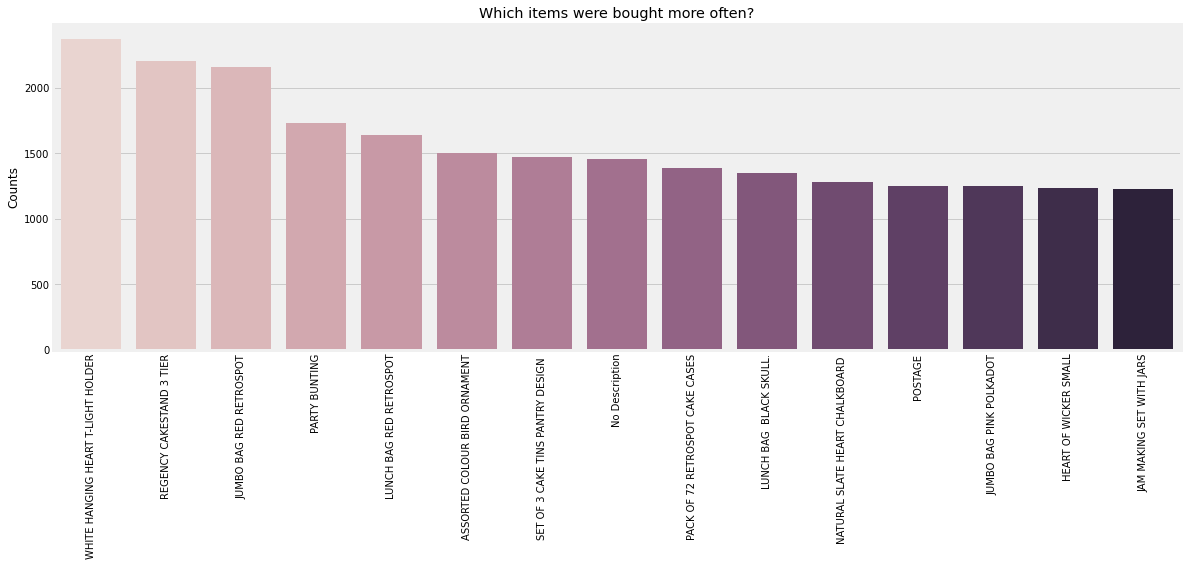

In [32]:
item_counts = df['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);